### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [2]:
plt.style.use('dark_background')
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "grey",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

## Generate Data

In [3]:
def get_train():
    seq = [[0.0, 0.1], [0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5]]
    seq = np.array(seq)
    X, y = seq[:, 0], seq[:, 1]
    X = X.reshape(len(X), 1, 1)
    
    return X, y

In [4]:
def get_validation():
    seq = [[0.5, 0.6], [0.6, 0.7], [0.7, 0.8], [0.8, 0.9], [0.9, 1.0]]
    seq = np.array(seq)
    X, y = seq[:, 0], seq[:, 1]
    X = X.reshape(len(X), 1, 1)
    
    return X, y

## Underfit Model

In [5]:
model_underfitting = Sequential()
model_underfitting.add(LSTM(10, input_shape=(1,1)))
model_underfitting.add(Dense(1, activation='linear'))

model_underfitting.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

X, y = get_train()
val_X, val_y = get_validation()
history_underfitting = model_underfitting.fit(X, y, epochs=100, validation_data=(val_X, val_y), shuffle=False) # less epochs

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.0845 - accuracy: 0.0000e+00 - val_loss: 0.4803 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 54ms/step - loss: 0.0830 - accuracy: 0.0000e+00 - val_loss: 0.4753 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 64ms/step - loss: 0.0816 - accuracy: 0.0000e+00 - val_loss: 0.4704 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 65ms/step - loss: 0.0802 - accuracy: 0.0000e+00 - val_loss: 0.4655 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 95ms/step - loss: 0.0789 - accuracy: 0.0000e+00 - val_loss: 0.4606 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 90ms/step - loss: 0.0775 - accuracy: 0.0000e+00 - val_loss: 0.4558 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 103ms/step - loss: 0.0761 - accuracy: 0.0000e+00 - val_loss:

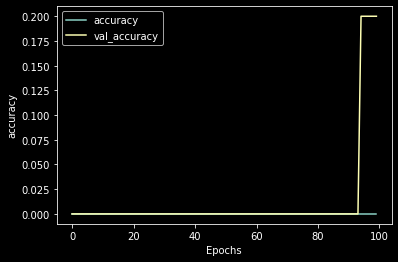

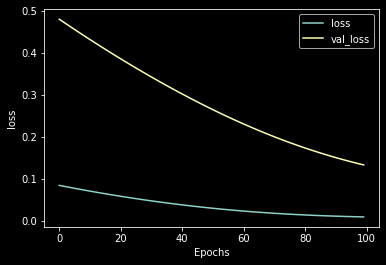

In [9]:
def plot_graphs(history, string):
  plt.plot(history_underfitting.history[string])
  plt.plot(history_underfitting.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history_underfitting, "accuracy")
plot_graphs(history_underfitting, "loss")

## Underfit Model

In [10]:
# set LSTM unit to 1 and optimizer to sgd
model_underfitting2 = Sequential()
model_underfitting2.add(LSTM(1, input_shape=(1,1))) # insufficient memory cells
model_underfitting2.add(Dense(1, activation='linear'))

model_underfitting2.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

X, y = get_train()
val_X, val_y = get_validation()
history_underfitting2 = model_underfitting2.fit(X, y, epochs=300, validation_data=(val_X, val_y), shuffle=False)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 0.1121 - accuracy: 0.0000e+00 - val_loss: 0.6650 - val_accuracy: 0.0000e+00
Epoch 2/300
1/1 [==============================] - 0s 43ms/step - loss: 0.1084 - accuracy: 0.0000e+00 - val_loss: 0.6555 - val_accuracy: 0.0000e+00
Epoch 3/300
1/1 [==============================] - 0s 34ms/step - loss: 0.1049 - accuracy: 0.0000e+00 - val_loss: 0.6462 - val_accuracy: 0.0000e+00
Epoch 4/300
1/1 [==============================] - 0s 32ms/step - loss: 0.1016 - accuracy: 0.0000e+00 - val_loss: 0.6372 - val_accuracy: 0.0000e+00
Epoch 5/300
1/1 [==============================] - 0s 30ms/step - loss: 0.0984 - accuracy: 0.0000e+00 - val_loss: 0.6284 - val_accuracy: 0.0000e+00
Epoch 6/300
1/1 [==============================] - 0s 30ms/step - loss: 0.0953 - accuracy: 0.0000e+00 - val_loss: 0.6199 - val_accuracy: 0.0000e+00
Epoch 7/300
1/1 [==============================] - 0s 34ms/step - loss: 0.0923 - accuracy: 0.0000e+00 - val_loss: 

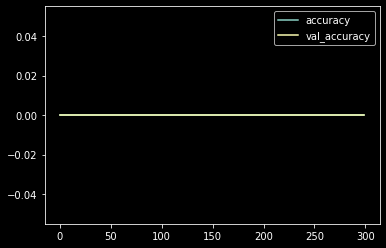

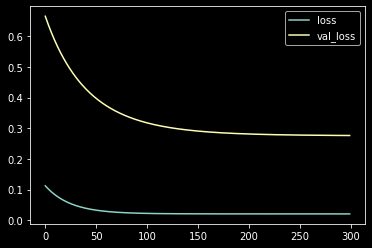

In [11]:
import pandas as pd

evaluation = pd.DataFrame(model_underfitting2.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

## Overfit Model

In [12]:
# set epochs to 1200 (too many training epochs)
model_overfitting = Sequential()
model_overfitting.add(LSTM(10, input_shape=(1,1)))
model_overfitting.add(Dense(1, activation='linear'))

model_overfitting.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

X, y = get_train()
val_X, val_y = get_validation()
history_overfitting = model_overfitting.fit(X, y, epochs=1200, validation_data=(val_X, val_y), shuffle=False)

Epoch 1/1200
1/1 [==============================] - 2s 2s/step - loss: 0.1155 - accuracy: 0.0000e+00 - val_loss: 0.6900 - val_accuracy: 0.0000e+00
Epoch 2/1200
1/1 [==============================] - 0s 33ms/step - loss: 0.1142 - accuracy: 0.0000e+00 - val_loss: 0.6855 - val_accuracy: 0.0000e+00
Epoch 3/1200
1/1 [==============================] - 0s 50ms/step - loss: 0.1129 - accuracy: 0.0000e+00 - val_loss: 0.6810 - val_accuracy: 0.0000e+00
Epoch 4/1200
1/1 [==============================] - 0s 33ms/step - loss: 0.1116 - accuracy: 0.0000e+00 - val_loss: 0.6765 - val_accuracy: 0.0000e+00
Epoch 5/1200
1/1 [==============================] - 0s 34ms/step - loss: 0.1103 - accuracy: 0.0000e+00 - val_loss: 0.6721 - val_accuracy: 0.0000e+00
Epoch 6/1200
1/1 [==============================] - 0s 31ms/step - loss: 0.1091 - accuracy: 0.0000e+00 - val_loss: 0.6677 - val_accuracy: 0.0000e+00
Epoch 7/1200
1/1 [==============================] - 0s 31ms/step - loss: 0.1078 - accuracy: 0.0000e+00 - val

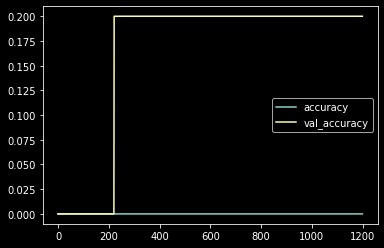

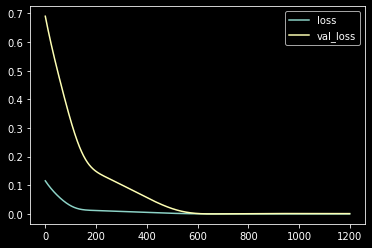

In [13]:
import pandas as pd

evaluation = pd.DataFrame(model_overfitting.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

## Fit model

In [15]:
# set epochs to 600
model_fitting = Sequential()
model_fitting.add(LSTM(10, input_shape=(1,1)))
model_fitting.add(Dense(1, activation='linear'))

model_fitting.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

X, y = get_train()
val_X, val_y = get_validation()
history_fitting = model_fitting.fit(X, y, epochs=650, validation_data=(val_X, val_y), shuffle=False)

Epoch 1/650
1/1 [==============================] - 3s 3s/step - loss: 0.1181 - accuracy: 0.0000e+00 - val_loss: 0.7105 - val_accuracy: 0.0000e+00
Epoch 2/650
1/1 [==============================] - 0s 32ms/step - loss: 0.1167 - accuracy: 0.0000e+00 - val_loss: 0.7054 - val_accuracy: 0.0000e+00
Epoch 3/650
1/1 [==============================] - 0s 31ms/step - loss: 0.1152 - accuracy: 0.0000e+00 - val_loss: 0.7004 - val_accuracy: 0.0000e+00
Epoch 4/650
1/1 [==============================] - 0s 33ms/step - loss: 0.1138 - accuracy: 0.0000e+00 - val_loss: 0.6955 - val_accuracy: 0.0000e+00
Epoch 5/650
1/1 [==============================] - 0s 33ms/step - loss: 0.1124 - accuracy: 0.0000e+00 - val_loss: 0.6905 - val_accuracy: 0.0000e+00
Epoch 6/650
1/1 [==============================] - 0s 31ms/step - loss: 0.1110 - accuracy: 0.0000e+00 - val_loss: 0.6856 - val_accuracy: 0.0000e+00
Epoch 7/650
1/1 [==============================] - 0s 33ms/step - loss: 0.1096 - accuracy: 0.0000e+00 - val_loss: 

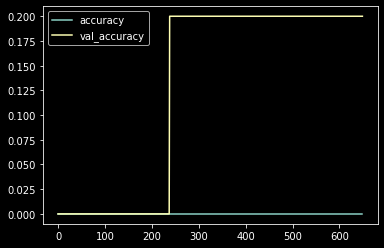

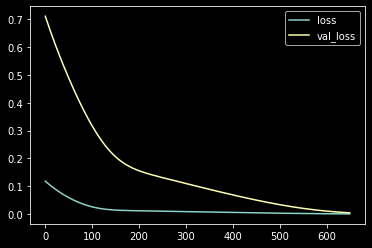

In [17]:
import pandas as pd

evaluation = pd.DataFrame(model_fitting.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

## Robust Model

In [18]:
train = pd.DataFrame()
validation = pd.DataFrame()

In [20]:
for i in range(5):
    model_robust = Sequential()
    model_robust.add(LSTM(10, input_shape=(1,1)))
    model_robust.add(Dense(1, activation='linear'))
    
    model_robust.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    
    X, y = get_train()
    val_X, val_y = get_validation()
    
    history_robust = model_robust.fit(X, y, epochs=300, validation_data=(val_X, val_y), shuffle=False)
    
    train[str(i)] = history_robust.history['loss']
    validation[str(i)] = history_robust.history['val_loss']

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 0.1056 - accuracy: 0.0000e+00 - val_loss: 0.6269 - val_accuracy: 0.0000e+00
Epoch 2/300
1/1 [==============================] - 0s 37ms/step - loss: 0.1041 - accuracy: 0.0000e+00 - val_loss: 0.6216 - val_accuracy: 0.0000e+00
Epoch 3/300
1/1 [==============================] - 0s 31ms/step - loss: 0.1026 - accuracy: 0.0000e+00 - val_loss: 0.6163 - val_accuracy: 0.0000e+00
Epoch 4/300
1/1 [==============================] - 0s 38ms/step - loss: 0.1011 - accuracy: 0.0000e+00 - val_loss: 0.6110 - val_accuracy: 0.0000e+00
Epoch 5/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0997 - accuracy: 0.0000e+00 - val_loss: 0.6058 - val_accuracy: 0.0000e+00
Epoch 6/300
1/1 [==============================] - 0s 33ms/step - loss: 0.0982 - accuracy: 0.0000e+00 - val_loss: 0.6006 - val_accuracy: 0.0000e+00
Epoch 7/300
1/1 [==============================] - 0s 37ms/step - loss: 0.0968 - accuracy: 0.0000e+00 - val_loss: 

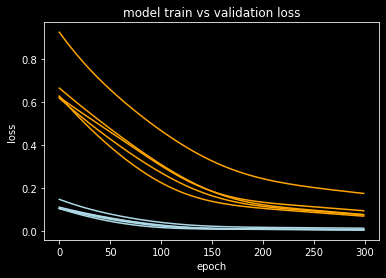

In [21]:
# plot train and validation loss across multiple runs considering stochastic phenomenon
plt.plot(train, color='lightblue', label='train')
plt.plot(validation, color='orange', label='validation')
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

---